# Name: Ahmed Mohamed Fekry Bagha
# ID: 4211032
# Group: (A) & Section: (B1)
# CNN - LSTM Assignment For "Stock Price Prediction using Financial Charts" by Yahoo Finance Stock Dataset (yfinance).

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

warnings.filterwarnings("ignore")

### Load and Prepare Data

In [2]:
def load_stock_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df[['Close']]

ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'
stock_data = load_stock_data(ticker, start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


### Data Visualization

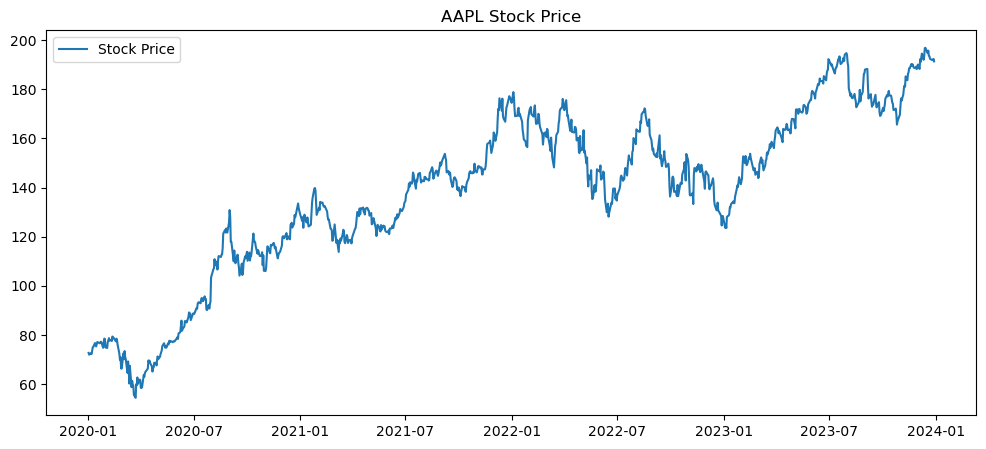

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(stock_data, label='Stock Price')
plt.title(f'{ticker} Stock Price')
plt.legend()
plt.show()

### Normalize Data

In [4]:
scaler = MinMaxScaler()
stock_data_scaled = scaler.fit_transform(stock_data)

### Data Segmentation

In [5]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(stock_data_scaled, time_steps)

### Split Data into Training and Testing Sets

In [6]:
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

### Model Architecture(CNN + LSTM)

In [7]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

### Model Training

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32, callbacks=[early_stopping])

Epoch 1/3
24/24 [==============================] - 5s 58ms/step - loss: 0.0594 - val_loss: 0.0028
Epoch 2/3
24/24 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0155
Epoch 3/3
24/24 [==============================] - 1s 50ms/step - loss: 0.0035 - val_loss: 0.0050


### Model Evaluation

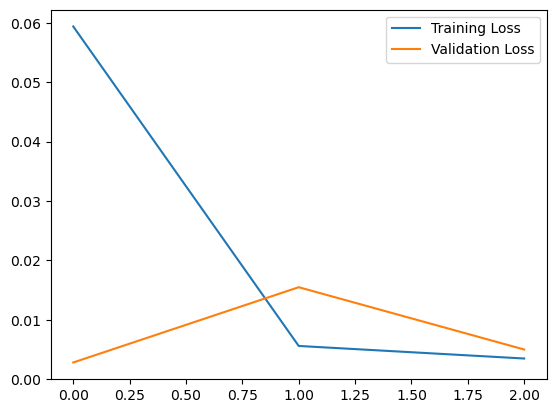

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### Predictions

In [10]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

6/6 [==============================] - 1s 20ms/step


### Calculate RMSE and R2 Score

In [11]:
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

RMSE: 10.0752
R2 Score: -0.0588


### Results Visualization

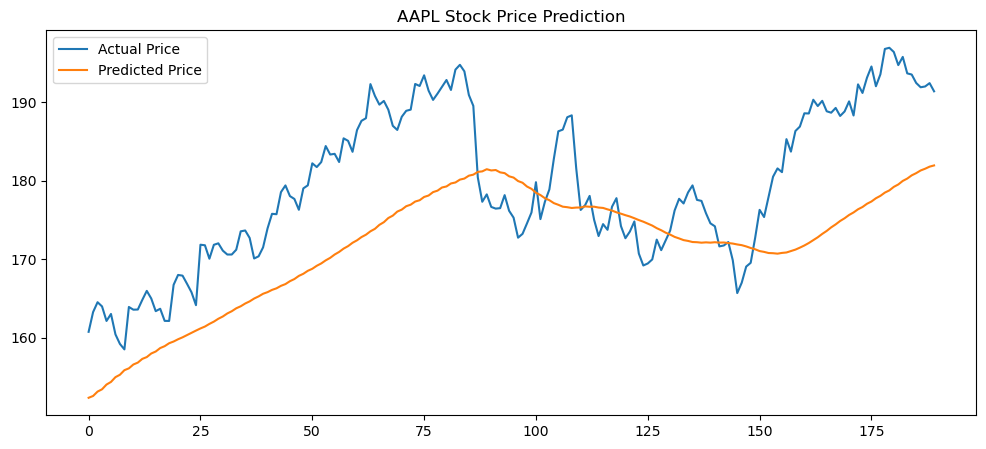

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.show()